### TIME SERIES PREDICTION
### Analysis of Chinese Gum Rosin Exp/Imp Prices and Volumes

#### Excercise 1 - Import price looking forward 24 months.

##### Data: 2013 - Today // Source: China.cn / Penta Transactions

##### Reference Material:

1. Good overall & recap of time series prediction slides: 
http://people.cs.pitt.edu/~milos/courses/cs3750/lectures/class16.pdf</li>
2. Checking Stationarity help source: https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788
3. Simple Exponential Smoothing help source: https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1
4. SARIMA help sources: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3. 
5. SARIMA additional codes: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
6. Article to use Fourier terms:
https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a

Let's start by importing packages...

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import warnings
import itertools
import datetime
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image
from IPython.core.display import HTML 

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

# Ignore the warning, can comment this 
warnings.filterwarnings("ignore")

# For graphing purpose, can change 
plt.style.use('bmh')
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['axes.labelcolor'] = 'r'
matplotlib.rcParams['xtick.color'] = 'r'
matplotlib.rcParams['ytick.color'] = 'r'

### Index

#### 1.- Upload, index by time column,  and analyse data from Excel file.
#### 2.- Visualizing the data
#### 3.- Decomposing the data
##### 3.1.- Additive decomposing
##### 3.2.- Multiplicative decomposing
#### 4.- Visualization: Graphing the rolling statistics for testing stationarity
##### 4.1.- Augmented Dickey-Fuller Test
##### 4.2.- Detrending
##### 4.3.- Differencing
##### 4.4.- Detrending + Differencing
#### 5.- Set the y_to_train, y_to_test, and the length of predict units 
#### 6.- Different time series prediction models
##### 6.1.- Simple exponential smothing
##### 6.2.- Holt
##### 6.3.- Holt-Winters
##### 6.4.- SARIMA


##
##

#### 1.- Upload, index by time column,  and analyse data from Excel file.

In [3]:
# Time Series Prediction parameters
Excel_file = 'Excel/20211115_apc_INST_Stats-CH-ExpImp.xlsx'
Excel_sheet = '38061010'

Index = 'month'
Index_lable = 'Monthly'

Prediction_column = 'imp_usd'

Date_start = '2013-01-01'
Date_end = '2021-09-01'
Month_to_test = '2021-03-01'

Resample = 'Q' # 'W' = weekly, 'M' = monthtly; 'Q' = quarterly; 'Y' = yearly
Resample_lable = 'Quarterly Mean Resample'


In [4]:
# Import the data
df = pd.read_excel(Excel_file, sheet_name=Excel_sheet)
df[Index] = pd.to_datetime(df[Index])
# Set the date as index 
df = df.set_index(Index)
# Select the proper time period for quarterly aggreagation
df = df[Date_start:Date_end]
dfq = df[Date_start:Date_end].resample(Resample).sum()
display(df)
df.info()

,country,trade,hs_code,exp_usd,exp_kg,exp_usd-ton,imp_usd,imp_kg,imp_usd-ton,source,Unnamed: 11,Unnamed: 12,Unnamed: 13
month,,,,,,,,,,,,,
2013-01-01,CHINA,IMP,3806.10.10,19648271.0,11455179.0,1715.230377,3946522.0,2530122.0,1559.814902,CHEM.CN,NaN,NaN,NaN
2013-02-01,CHINA,IMP,3806.10.10,10967920.0,6347619.0,1727.879383,1467207.0,949783.0,1544.781282,CHEM.CN,NaN,NaN,NaN
2013-03-01,CHINA,IMP,3806.10.10,17970939.0,10499621.0,1711.579780,3973710.0,2701382.0,1470.991515,CHEM.CN,NaN,NaN,NaN
2013-04-01,CHINA,IMP,3806.10.10,16189951.0,8989457.0,1800.993208,4212300.0,2908892.0,1448.077137,CHEM.CN,NaN,NaN,NaN
2013-05-01,CHINA,IMP,3806.10.10,23905015.0,13579900.0,1760.323346,3790984.0,2605899.0,1454.770120,CHEM.CN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01,CHINA,IMP,3806.10.10,4543528.0,1838850.0,2470.852979,14353253.0,9213880.0,1557.785971,ROSINEB,NaN,NaN,NaN
2021-06-01,CHINA,IMP,3806.10.10,4098514.0,1646580.0,2489.107119,13295284.0,8266430.0,1608.346529,ROSINEB,NaN,NaN,NaN
2021-07-01,CHINA,IMP,3806.10.10,4503560.0,1903520.0,2365.911574,10982922.0,6802280.0,1614.594224,ROSINEB,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 2013-01-01 to 2021-09-01
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      105 non-null    object 
 1   trade        105 non-null    object 
 2   hs_code      105 non-null    object 
 3   exp_usd      105 non-null    float64
 4   exp_kg       105 non-null    float64
 5   exp_usd-ton  105 non-null    float64
 6   imp_usd      105 non-null    float64
 7   imp_kg       105 non-null    float64
 8   imp_usd-ton  105 non-null    float64
 9   source       105 non-null    object 
 10  Unnamed: 11  0 non-null      float64
 11  Unnamed: 12  0 non-null      float64
 12  Unnamed: 13  0 non-null      float64
dtypes: float64(9), object(4)
memory usage: 15.6+ KB


<AxesSubplot:>

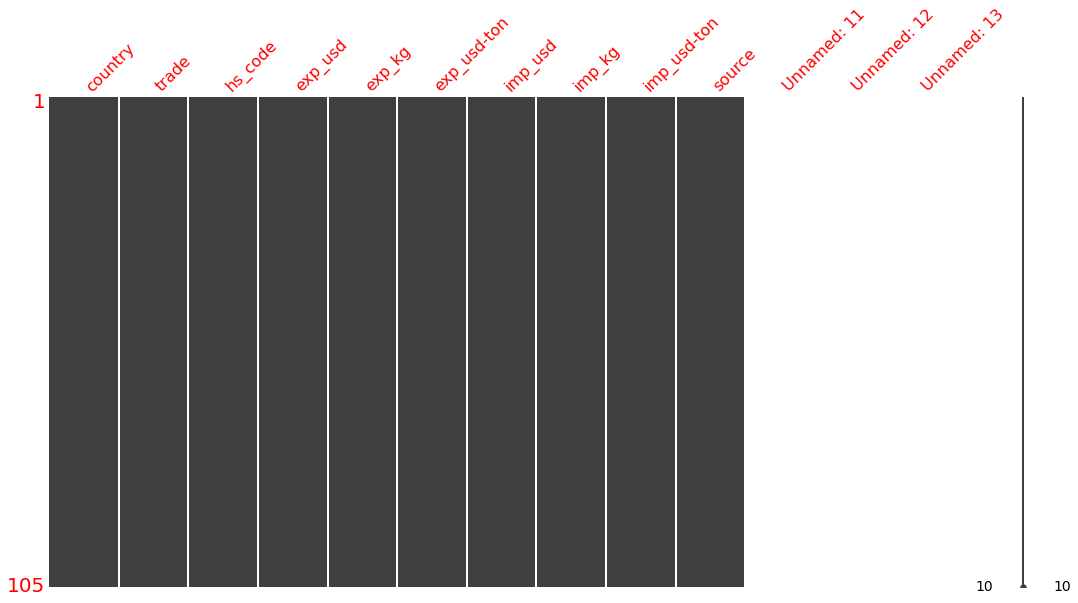

In [5]:
msno.matrix(df, figsize=(18,9))

In [6]:
display(dfq)
dfq.info()

,exp_usd,exp_kg,exp_usd-ton,imp_usd,imp_kg,imp_usd-ton,Unnamed: 11,Unnamed: 12,Unnamed: 13
month,,,,,,,,,
2013-03-31,48587130.0,28302419.0,5154.689540,9387439.0,6181287.0,4575.587699,0.0,0.0,0.0
2013-06-30,55763968.0,31485299.0,5318.730633,10744372.0,7326729.0,4415.640741,0.0,0.0,0.0
2013-09-30,61655499.0,30929579.0,5873.425926,14217740.0,9673180.0,4408.725527,0.0,0.0,0.0
2013-12-31,106209461.0,42419197.0,7489.663500,13266008.0,7232035.0,5548.689569,0.0,0.0,0.0
2014-03-31,74869829.0,29590314.0,7607.172959,9156222.0,4238626.0,6506.670350,0.0,0.0,0.0
2014-06-30,64434190.0,25552610.0,7566.268477,6822961.0,3005429.0,6770.198781,0.0,0.0,0.0
2014-09-30,92977140.0,39696541.0,7026.756626,5084745.0,2279618.0,6677.928477,0.0,0.0,0.0
2014-12-31,64309494.0,27629703.0,6978.967061,4317636.0,1828691.0,7293.135404,0.0,0.0,0.0
2015-03-31,58412901.0,22771498.0,7668.727495,5629633.0,2764681.0,6194.439296,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2013-03-31 to 2021-09-30
Freq: Q-DEC
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   exp_usd      35 non-null     float64
 1   exp_kg       35 non-null     float64
 2   exp_usd-ton  35 non-null     float64
 3   imp_usd      35 non-null     float64
 4   imp_kg       35 non-null     float64
 5   imp_usd-ton  35 non-null     float64
 6   Unnamed: 11  35 non-null     float64
 7   Unnamed: 12  35 non-null     float64
 8   Unnamed: 13  35 non-null     float64
dtypes: float64(9)
memory usage: 2.7 KB


#### 2.- Visualizing the data 

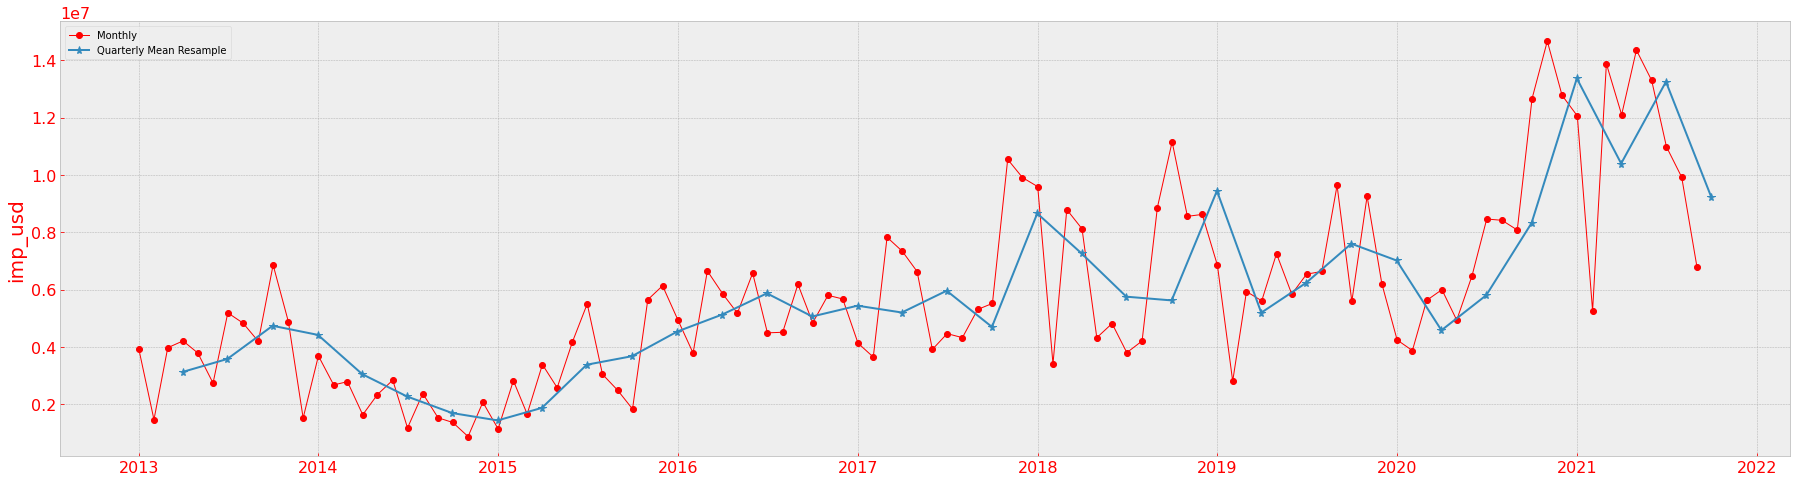

In [7]:
y = df[Prediction_column]
fig, ax = plt.subplots(figsize=(31, 8))
ax.plot(y,marker='o', color='red', linestyle='-', linewidth=1, label=Index_lable)
ax.plot(y.resample('Q').mean(),marker='*', markersize=8, linestyle='-', label=Resample_lable)
ax.set_ylabel(Prediction_column)
ax.legend();

#### 3.- Decomposing the data

Additive decomposition: y(t) = Level + Trend + Seasonality + Noise <br>
Multiplicative decomposition: y(t) = Level * Trend * Seasonality * Noise <br><br>
<a href="https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/">How to Decompose Time Series Data into Trend and Seasonality</a>

##### 3.1.- Additive decomposing

In [8]:
# graphs to show seasonal_decompose
def seasonal_decompose_add (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(31,8)
    plt.show()

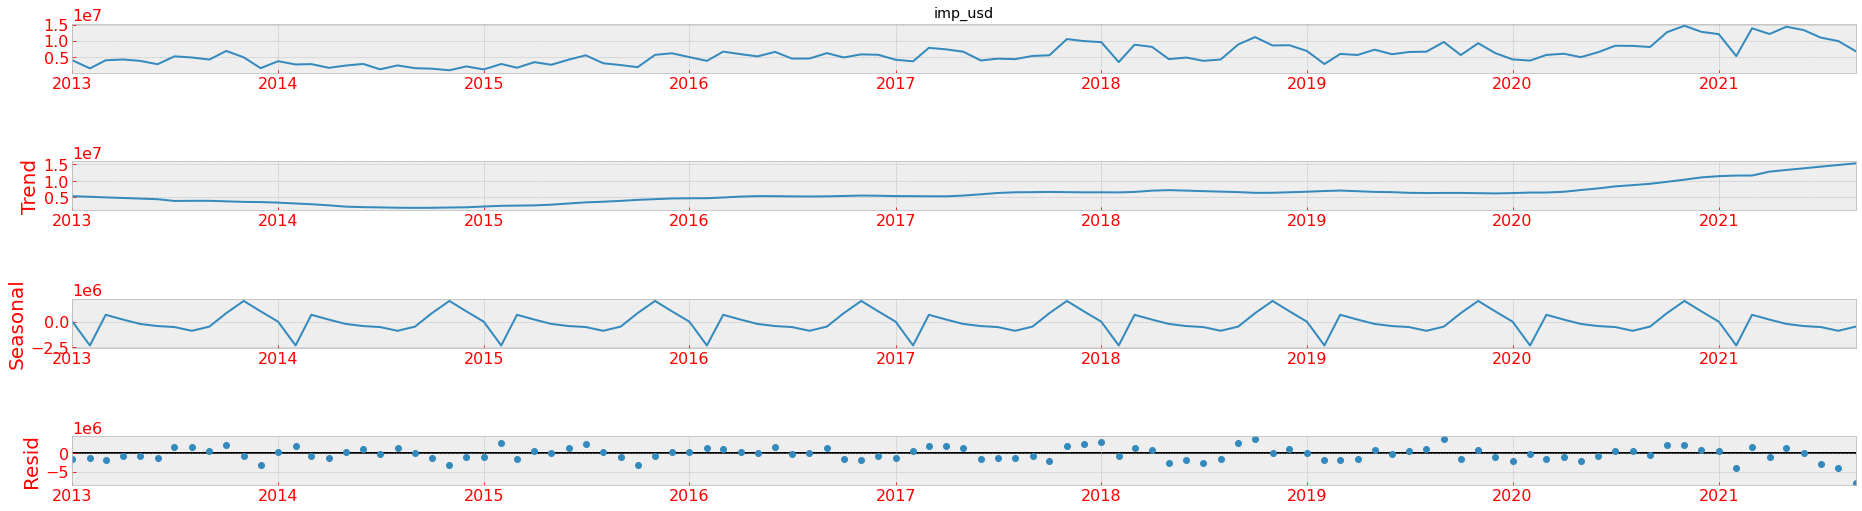

In [9]:
seasonal_decompose_add(y)

##### 3.2.- Multiplicative decomposing

In [10]:
# graphs to show seasonal_decompose
def seasonal_decompose_mult (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(31,8)
    plt.show()

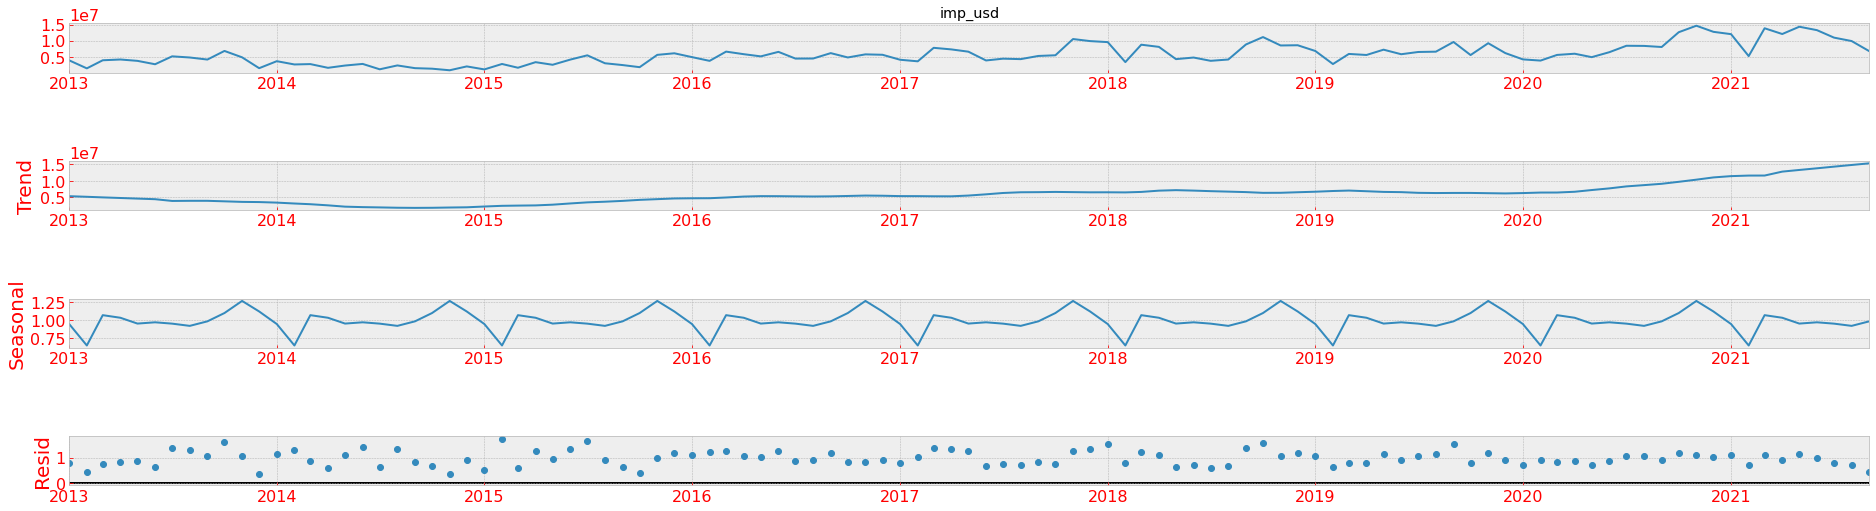

In [11]:
seasonal_decompose_mult(y)

#### 4.- Visualization: Graphing the rolling statistics for testing stationarity

In [12]:
# Plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(31, 8))
    ax.plot(timeseries, color='red', label= title)
    ax.plot(rolmean, color='black', label='rolling mean');
    ax.plot(rolstd, color='blue', label='rolling std (x10)');
    ax.legend()
    

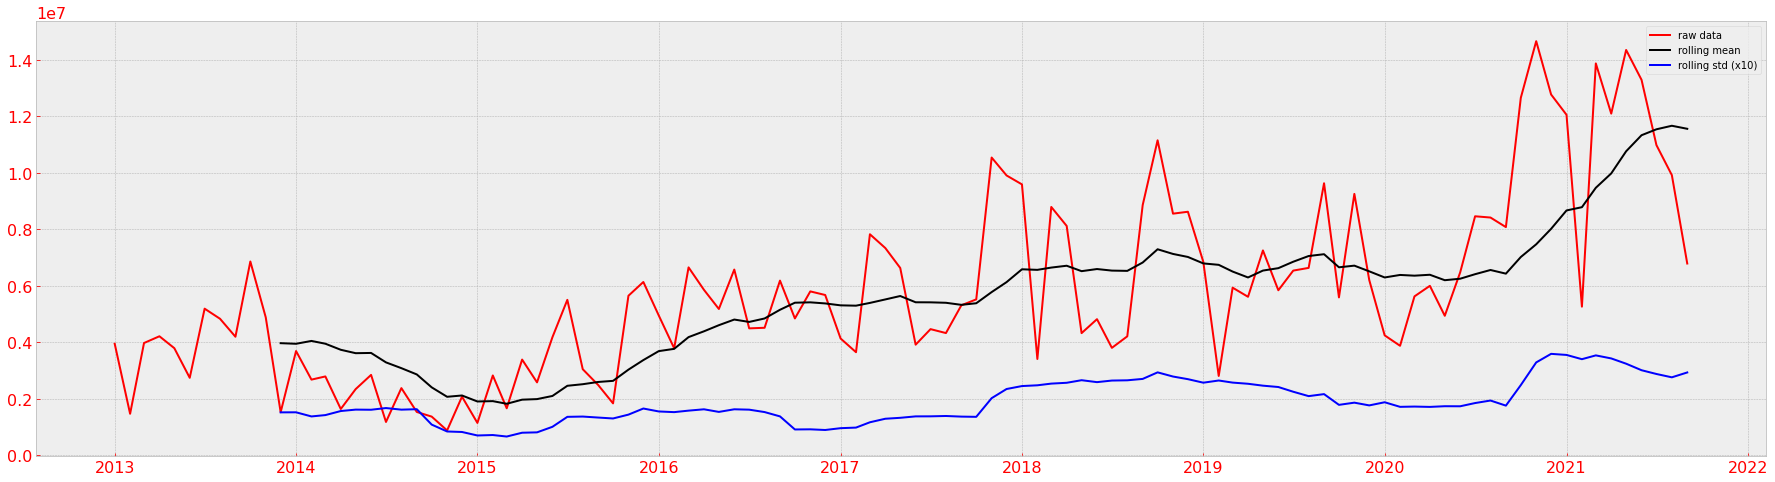

In [13]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

##### 4.1.- Augmented Dickey-Fuller Test

In [14]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))


In [15]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = -3.000
P-value = 0.035
Critical values :
	1%: -3.4954932834550623 - The data is not stationary with 99% confidence
	5%: -2.8900369024285117 - The data is  stationary with 95% confidence
	10%: -2.5819706975209726 - The data is  stationary with 90% confidence


##### 4.2.- Detrending

 > Is the de-trended data stationary ?
Test statistic = -5.611
P-value = 0.000
Critical values :
	1%: -3.5137900174243235 - The data is  stationary with 99% confidence
	5%: -2.8979433868293945 - The data is  stationary with 95% confidence
	10%: -2.5861907285474777 - The data is  stationary with 90% confidence


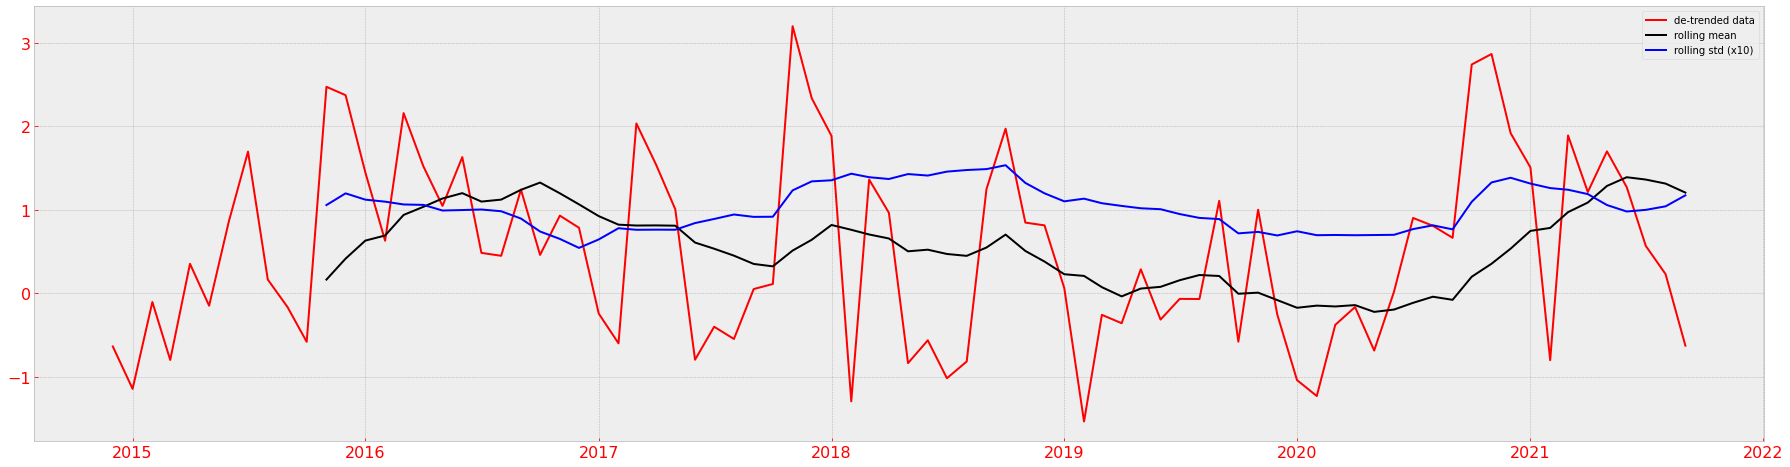

In [16]:
# Detrending
y_detrend =  (y - y.rolling(window=24).mean())/y.rolling(window=24).std()

test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

##### 4.3.- Differencing

 > Is the 24 lag differenced data stationary ?
Test statistic = -4.482
P-value = 0.000
Critical values :
	1%: -3.5148692050781247 - The data is  stationary with 99% confidence
	5%: -2.8984085156250003 - The data is  stationary with 95% confidence
	10%: -2.58643890625 - The data is  stationary with 90% confidence


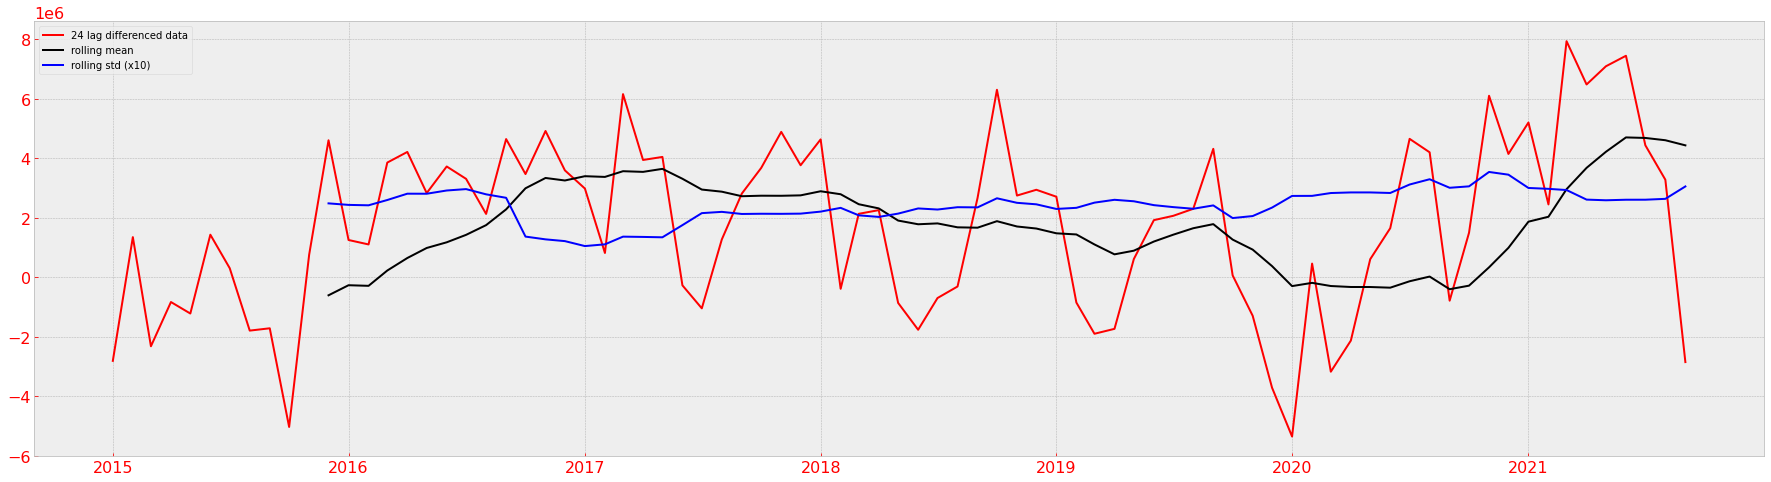

In [17]:
# Differencing
y_24lag =  y - y.shift(24)

test_stationarity(y_24lag,'24 lag differenced data')
ADF_test(y_24lag,'24 lag differenced data')

##### 4.4.- Detrending + Differencing

 > Is the 24 lag differenced de-trended data stationary ?
Test statistic = -3.787
P-value = 0.003
Critical values :
	1%: -3.5506699942762414 - The data is  stationary with 99% confidence
	5%: -2.913766394626147 - The data is  stationary with 95% confidence
	10%: -2.5946240473991997 - The data is  stationary with 90% confidence


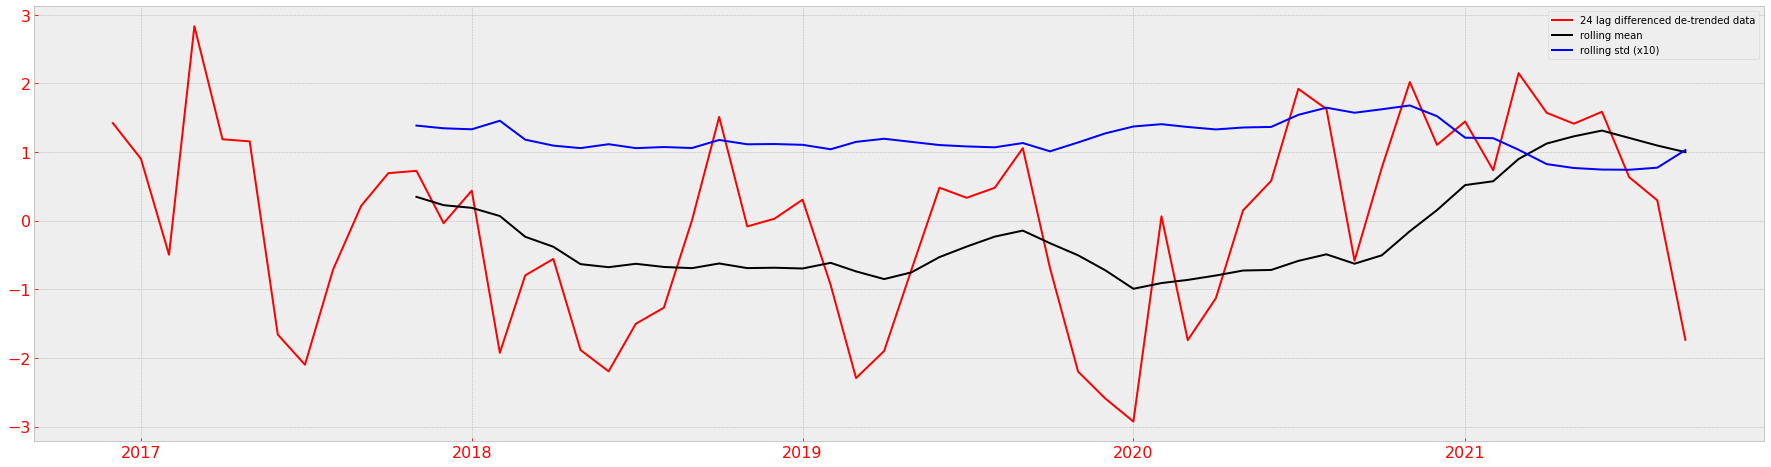

In [18]:
# Detrending + Differencing

y_24lag_detrend =  y_detrend - y_detrend.shift(24)

test_stationarity(y_24lag_detrend,'24 lag differenced de-trended data')
ADF_test(y_24lag_detrend,'24 lag differenced de-trended data')

#### 5.- Set the y_to_train, y_to_test, and the length of predict units 

In [19]:
y_to_train = y[Date_start:Month_to_test] # dataset to train
y_to_val = y[Month_to_test:]             # last X months for test  
predict_date = 24                        #len(y) - len(y[:Month_to_test]) # the number of data points for the test setp
print(predict_date)

24


#### 6.- Different time series prediction models
##### 6.1.- Simple exponential smothing

In [20]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='red', legend=True, figsize=(31, 8))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='*', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='*',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    fcast2.plot(marker='*', color='green', legend=True)
    fit2.fittedvalues.plot(marker='*', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()
    

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 2733046.65
The Root Mean Squared Error of our forecasts with auto optimization is 2460679.33


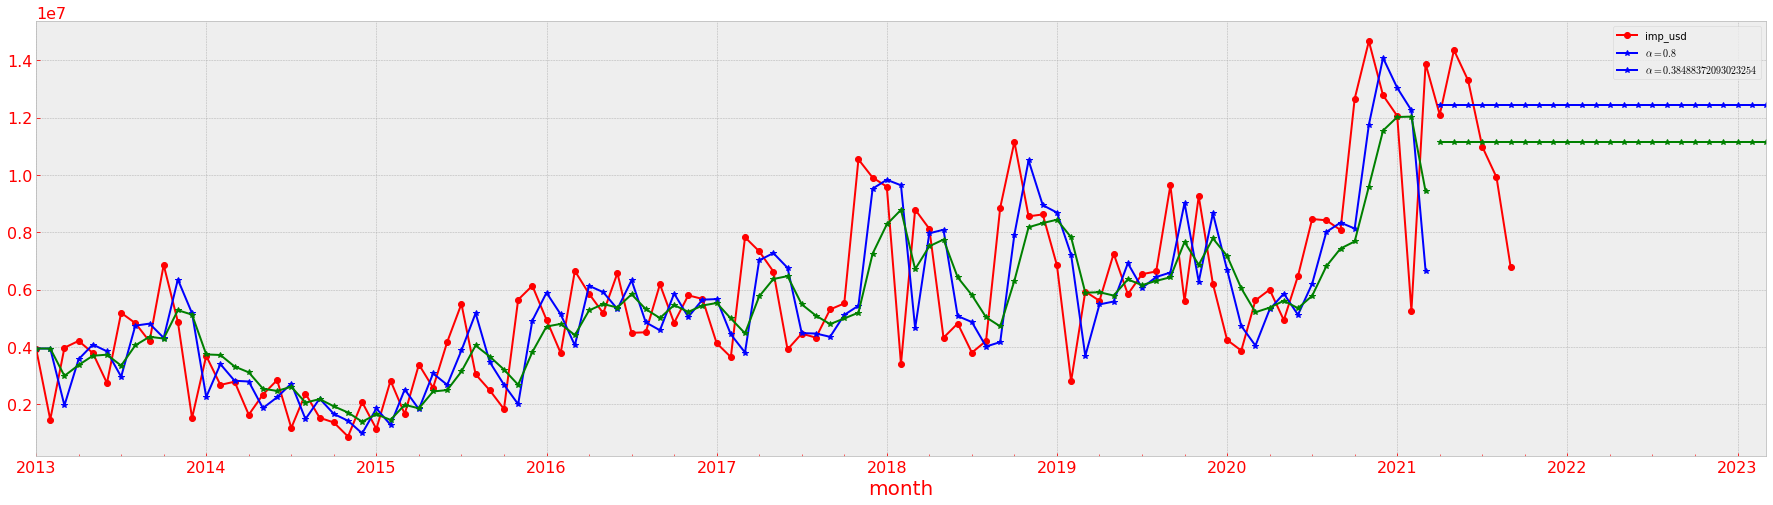

In [21]:
ses(y, y_to_train, y_to_val, 0.8, predict_date)

##### 6.2.- Holt

In [22]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='red', legend=True, figsize=(31, 8))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="*", color='blue')
    fcast1.plot(color='blue', marker="*", legend=True)
    fit2.fittedvalues.plot(marker="*", color='green')
    fcast2.plot(color='red', marker="*", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 3264786.58
The Root Mean Squared Error of Holts Exponential trend 5469066.39


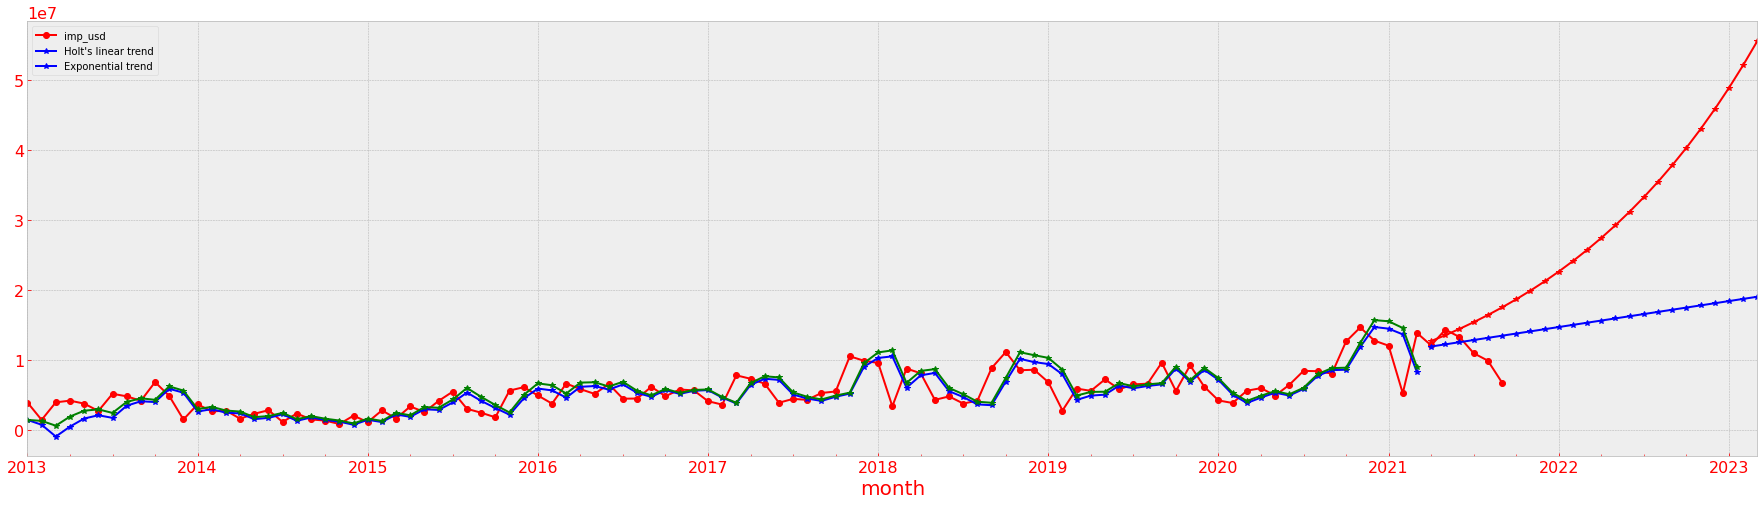

In [23]:
holt(y, y_to_train,y_to_val,0.6,0.2,predict_date)

##### 6.3.- Holt-Winters

In [24]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='red', legend=True, figsize=(31, 8))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='blue')
        fcast1.plot(style='--', marker='*', color='blue', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='*', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='blue')
        fcast3.plot(style='--', marker='*', color='blue', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='*', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=24 and a Box-Cox transformation 5194898.36
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=24 and a Box-Cox transformation 3855116.91


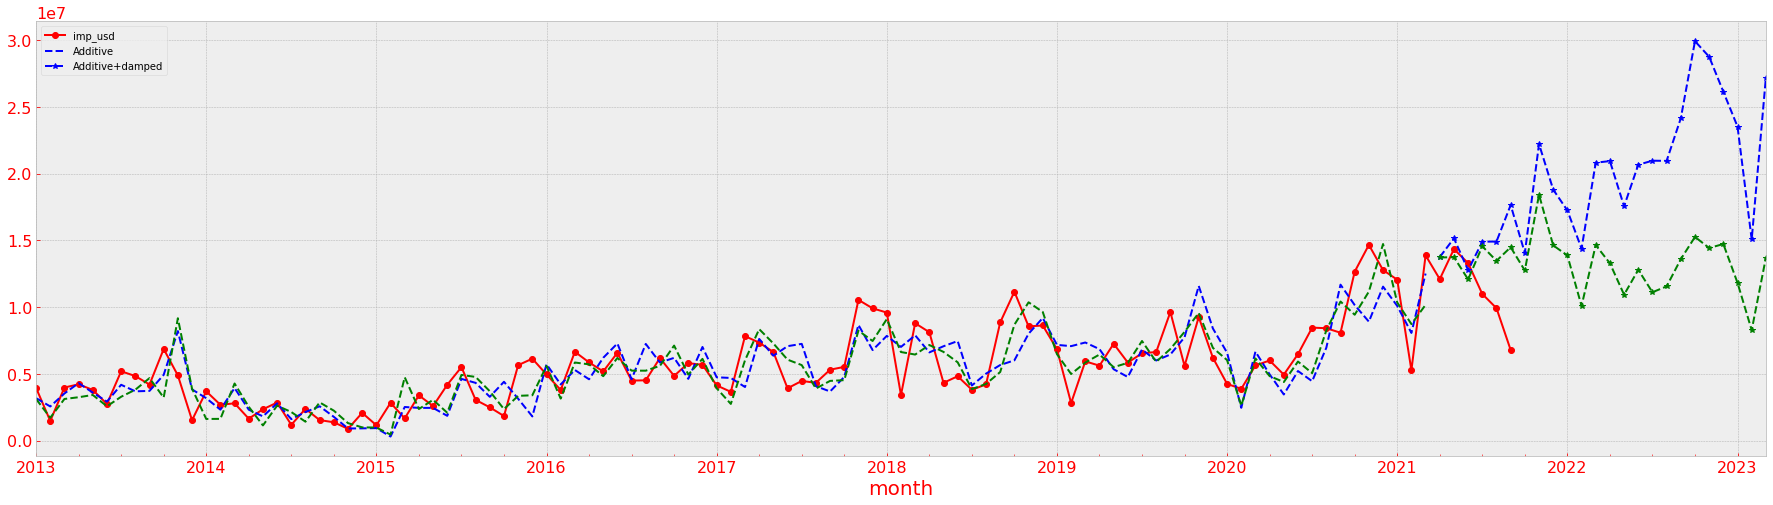

In [25]:
holt_win_sea(y, y_to_train,y_to_val,'additive',24, predict_date)

##### 6.4.- SARIMA

<img src="img/20211117_070254.png" width=1000 height=600 />
<a href="https://github.com/alexcunn/Time-Series-Prediction">GitHub: Vera Shao / Bounteous - Time Series Prediction</a>

In [26]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))


In [27]:
sarima_grid_search(y,24)

The set of parameters with the minimum AIC is: SARIMA(1, 1, 1)x(1, 1, 0, 24) - AIC:1777.4366587108898


In [28]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(31, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

In [29]:
sarima_date = datetime.datetime(2020, 12, 1)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5743      0.160      3.595      0.000       0.261       0.887
ma.L1         -0.9793      0.024    -41.610      0.000      -1.025      -0.933
ar.S.L24      -0.4217      0.192     -2.196      0.028      -0.798      -0.045
sigma2      6.415e+12   5.74e-15   1.12e+27      0.000    6.42e+12    6.42e+12


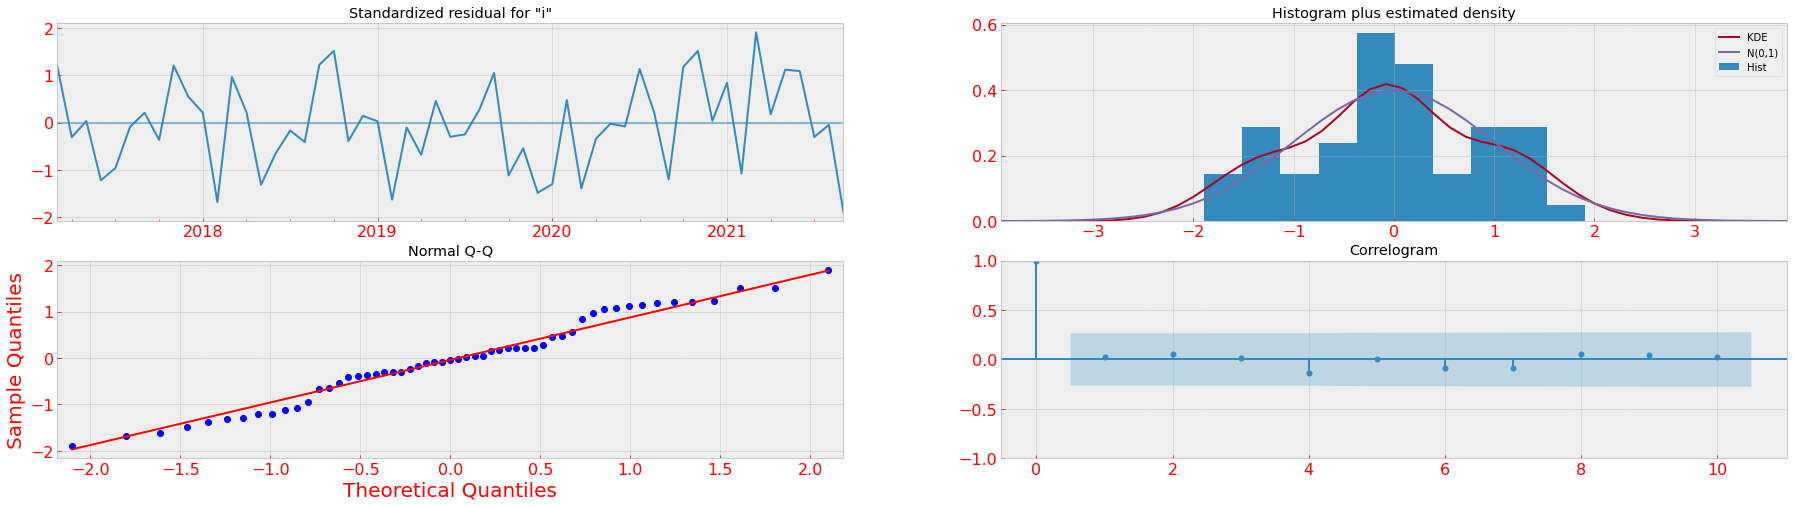

The Root Mean Squared Error of SARIMA with season_length=24 and dynamic = False 2991227.14


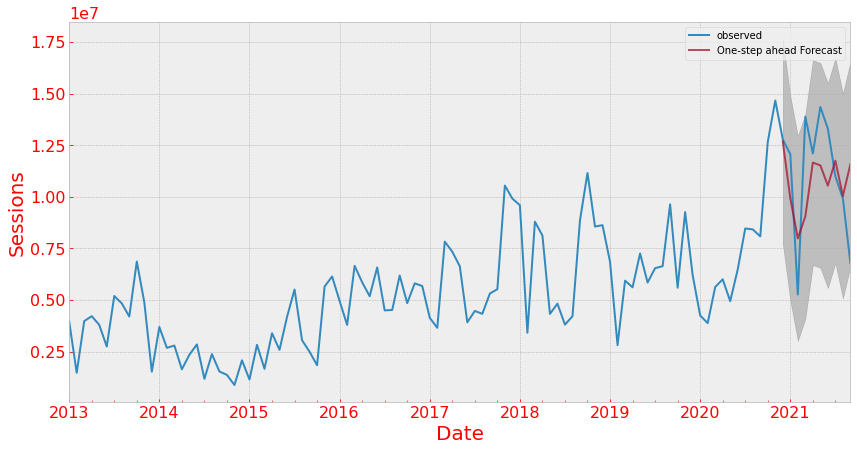

The Root Mean Squared Error of SARIMA with season_length=24 and dynamic = True 3750318.02


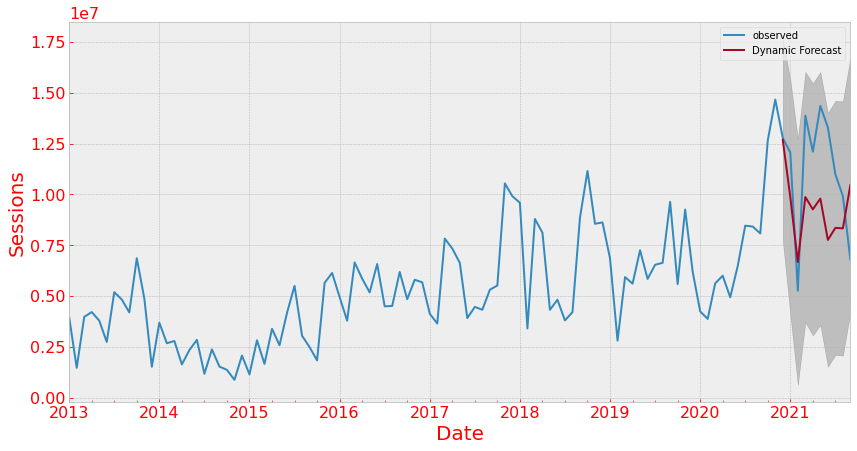

In [30]:
model = sarima_eva(y,(1, 1, 1),(1, 1, 0, 24),24,sarima_date,y_to_val)

In [31]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(31, 8))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

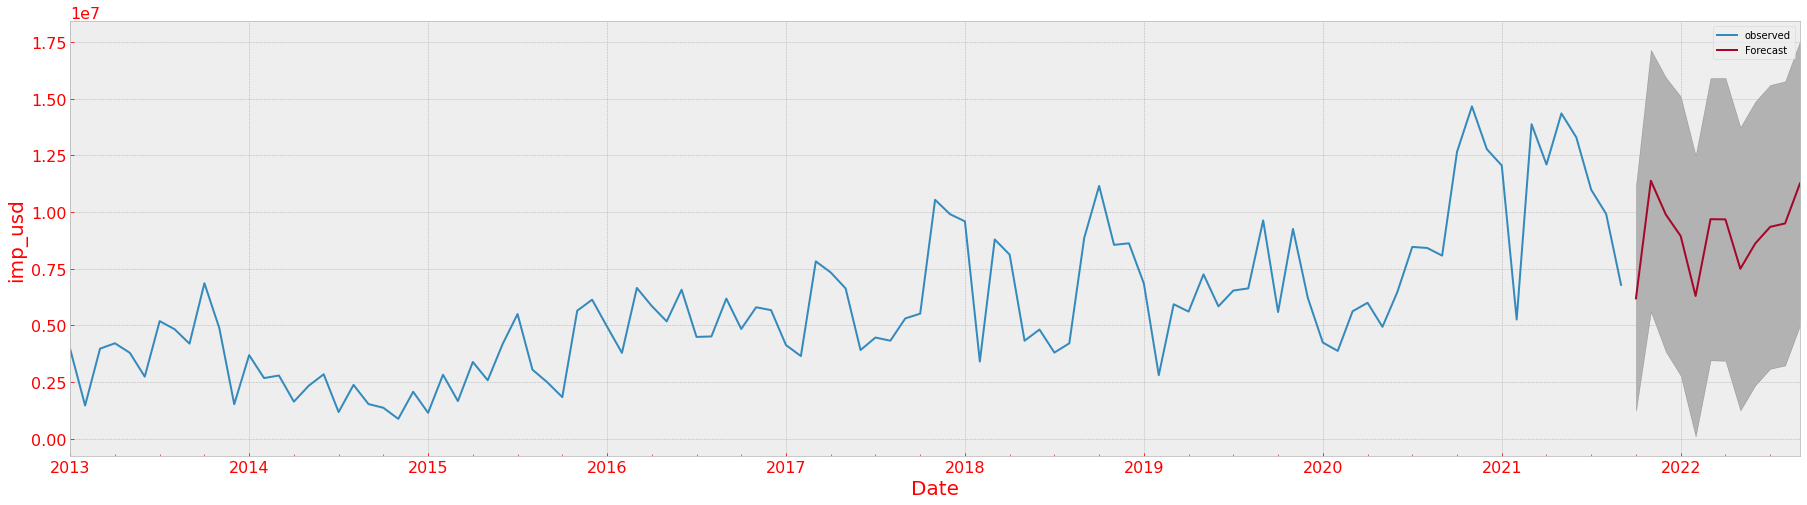

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2021-10-01,6193748.34698224,1229463.66495358,11158033.02901089
1,2021-11-01,11382162.05479544,5605523.43635992,17158800.67323095
2,2021-12-01,9894155.57180573,3843771.36380075,15944539.77981071
3,2022-01-01,8941959.61634559,2785800.78326614,15098118.44942504
4,2022-02-01,6300279.17616117,97934.72676723,12502623.62555511


In [32]:
final_table = forecast(model,12,y)
final_table.head()

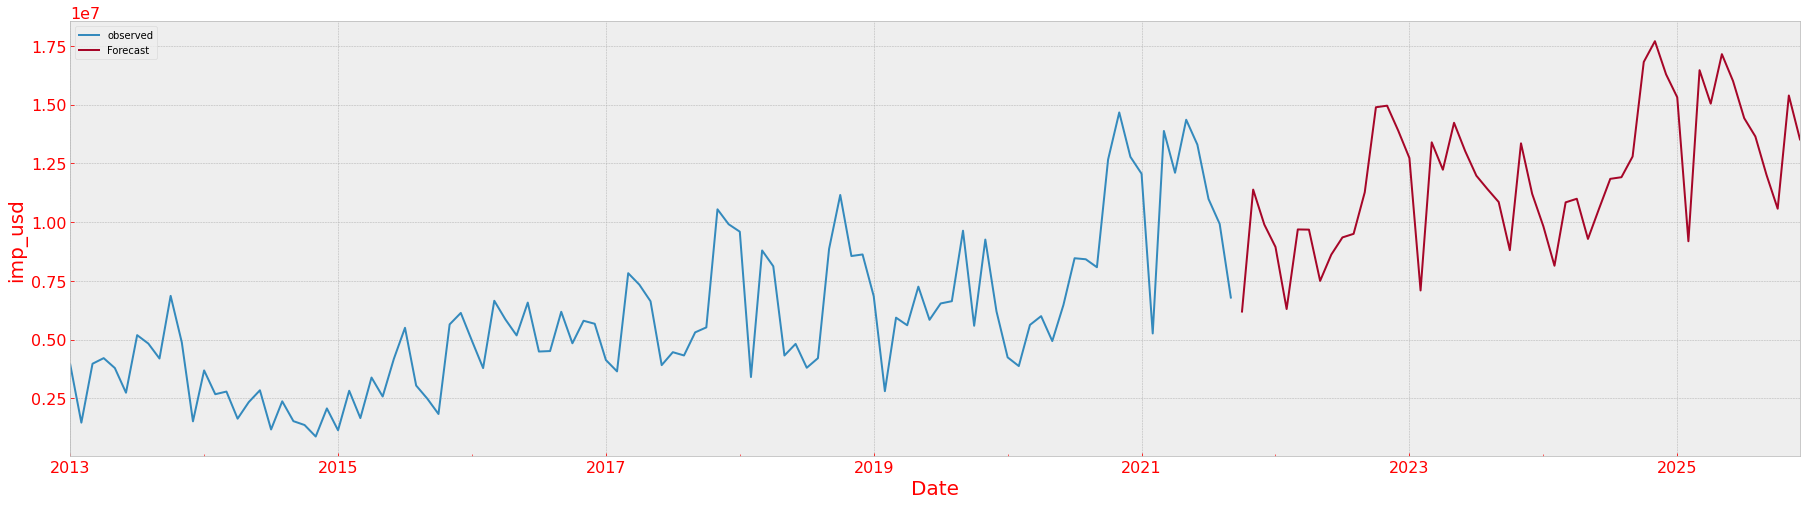

In [33]:
### Graphs without the confident interval 
pred_uc = model.get_forecast(steps=51)
ax = y.plot(label='observed', figsize=(31, 8))
#     print(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)

plt.legend()
plt.show()

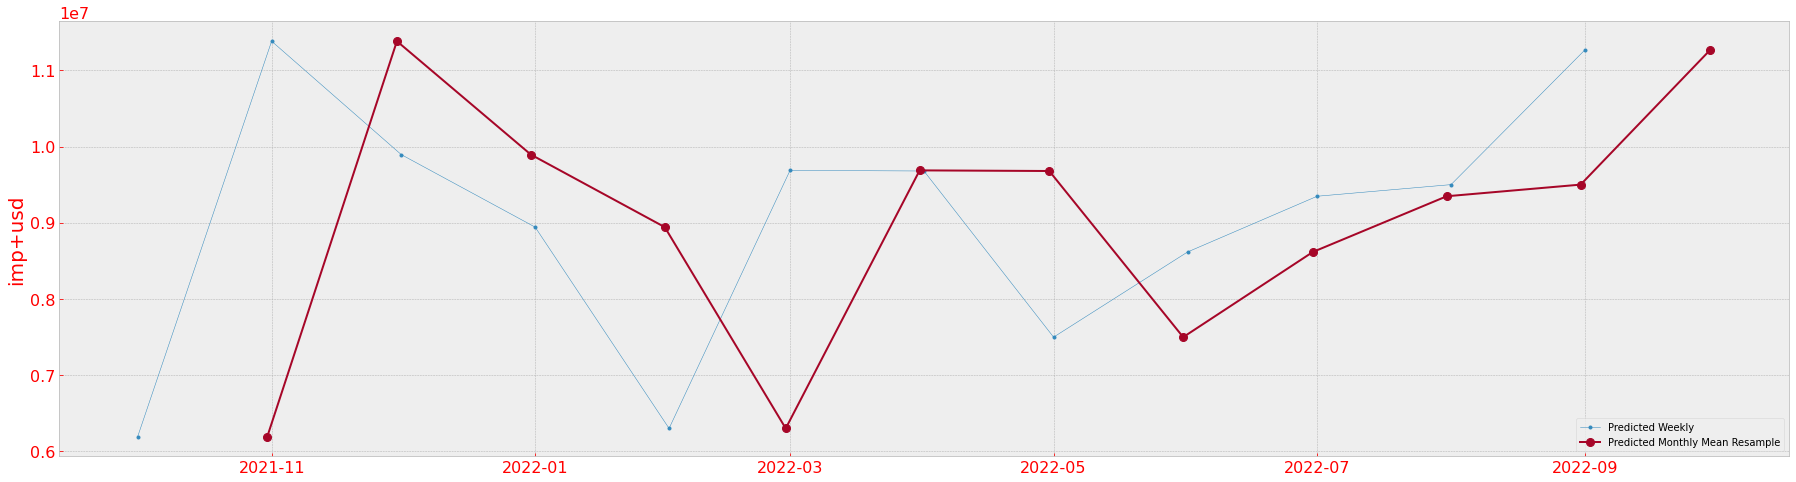

In [34]:
### Graphs show only the perdiected period
final_table.index = final_table.Date
fig, ax = plt.subplots( figsize=(31, 8))
# ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(final_table.Predicted_Mean,marker='.', linestyle='-', linewidth=0.5, label='Predicted Weekly')
# ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(final_table.Predicted_Mean.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Predicted Monthly Mean Resample')
ax.set_ylabel('imp+usd')
ax.legend();